In [97]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [98]:
xtrain = np.arange(10, dtype=np.float32).reshape(-1, 1)

In [99]:
ytrain = np.array([1, 1.3, 3.1, 2, 5, 6.3, 6.6, 7.4, 8, 9], dtype=np.float32)

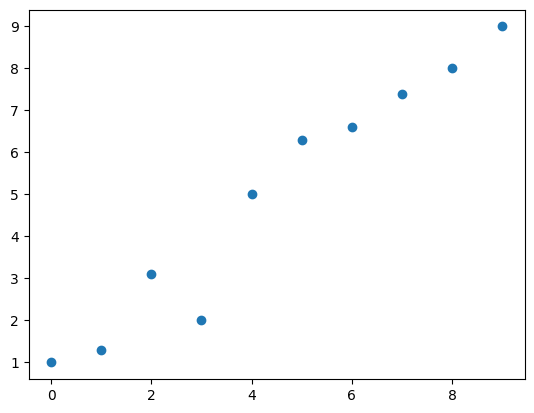

In [100]:
plt.scatter(xtrain, ytrain)

In [101]:
xnorm = (xtrain - np.mean(xtrain)) / np.std(xtrain)

In [102]:
xtrain_ = torch.tensor(xnorm, dtype=torch.float32)

In [103]:
ytrain_ = torch.tensor(ytrain.reshape(-1, 1), dtype=torch.float32)

In [104]:
train = torch.utils.data.TensorDataset(xtrain_, ytrain_)

In [105]:
train = torch.utils.data.DataLoader(
    dataset=train, batch_size=1, shuffle=True
    )

definindo a função de perda

In [106]:
def fn_loss(input_, target_):
    return (input_ - target_).pow(2).mean()

definindo o modelo

In [107]:
torch.manual_seed(seed=1)

pesos_ = torch.randn(1)
pesos_.requires_grad_()
bias_  = torch.zeros(1, requires_grad=True)

def model(xb):
    return xb @ pesos_ + bias_

In [108]:
lr = 0.001
log_epochs = 10

In [109]:
import time
def printing_(i, length_train, loss, sleep=0.1):
    progress = i / len(train)
    print(  f"\rBatch {i}/{length_train} "
            f"[{int(progress * 20) * '='}>{int((1 - progress) * 30) * ' '}] "
            f"{progress * 100:.2f}% - Loss: {loss:.4f}", end="")
    time.sleep(sleep)
    
def final_epoch(l_loss):
    print()
    print(f'    > loss_mean:{np.mean(l_loss):2f}')

In [110]:
len_ = len(train)
for epoch in range(10):
    l_loss = []
    for batch_i, (xbatch, ybatch) in enumerate(train, 1):
        pred = model(xbatch)

        loss = fn_loss(pred, ybatch)

        loss.backward()
        l_loss.append(loss.item())
        printing_(batch_i, len_, loss.item())
    with torch.no_grad():
        pesos_ -= pesos_.grad * lr
        bias_  -= bias_.grad * lr

        pesos_.grad.zero_()
        bias_.grad.zero_()

    final_epoch(l_loss)
    

      
        

Batch 10/10 [====================>] 100.00% - Loss: 46.57200327535
    > loss_mean:29.287950
Batch 10/10 [====================>] 100.00% - Loss: 25.22904725014
    > loss_mean:28.144095
Batch 10/10 [====================>] 100.00% - Loss: 35.68827697977
    > loss_mean:27.045537
Batch 10/10 [====================>] 100.00% - Loss: 3.73394234641
    > loss_mean:25.990483
Batch 10/10 [====================>] 100.00% - Loss: 33.47623740537
    > loss_mean:24.977209
Batch 10/10 [====================>] 100.00% - Loss: 3.488996644609
    > loss_mean:24.004060
Batch 10/10 [====================>] 100.00% - Loss: 10.96625796045
    > loss_mean:23.069450
Batch 10/10 [====================>] 100.00% - Loss: 20.31013045298
    > loss_mean:22.171847
Batch 10/10 [====================>] 100.00% - Loss: 45.4799985944
    > loss_mean:21.309790
Batch 10/10 [====================>] 100.00% - Loss: 32.51396432036
    > loss_mean:20.481872


In [113]:
model(xtrain_).detach()

tensor([-0.7132, -0.3527,  0.0078,  0.3684,  0.7289,  1.0894,  1.4499,  1.8105,
         2.1710,  2.5315])

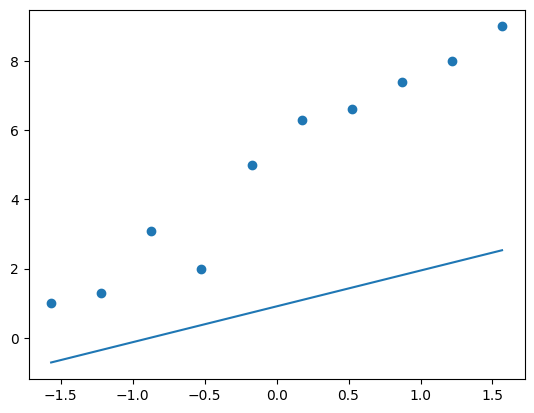

In [114]:
plt.scatter(xtrain_, ytrain_)
plt.plot(xtrain_, model(xtrain_).detach())